# Automated Machine Learning Tutorial - TPOT
[I. Why do we use AutoML?](#why)<br>
[II. Introduction to TPOT](#intro)<br>
[III. Installing TPOT](#install)<br>
[IV. How TPOT works?](#work)<br>
[V. Default Setting of TPOT](#default)<br>
[VI. Implement TPOT](#implement)<br>
[VII. Pros & Cons](#p&c) <br>
[VIII. Conclusion](#conclusion)<br>
[IX. Reference](#reference)<br>

<img src='https://github.com/elletsai/autoML/blob/master/png/tpot-logo.jpeg?raw=true' style="width: 400px;">
<div style="text-align:center">
        <a href="https://epistasislab.github.io/tpot/"> 
           TPOT logo (source: TPOT docs) 
        </a>
</div>


## <a name = why></a>I. Why do we use AutoML?
In such an era of information explosion, Machine Learning and Artificial Intelligence play an important role in many industries such as Healthcare, transpotation, financial service etc. Data Science experts are highly involved in tranditional Machine Learning applications to help with feature engineering, model selecting and parameter tuning. To reduce the tedious workload for human experts and lower the barrier to entry, AutoML has emerged as a solution. AutoML covers the complete pipeline from feature engineering to a deployable machine learning model <a href="https://www.wikiwand.com/en/Automated_machine_learning"> (source: Wikiwand)</a>. Therefore, it not only helps data scientist to reduce time of building models and to better focus on interpreting results to clients but also makes machine learning techniques accessible for people not knowing a lot about data science. There are several autoML packages available:
1. [TPOT](http://epistasislab.github.io/tpot/)
2. [H2O](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
3. [auto-sklearn](https://automl.github.io/auto-sklearn/master/)
4. [Microsoft autoML](https://docs.microsoft.com/en-us/azure/machine-learning/service/concept-automated-ml)

In this post, We will focus on introducing AutoML technique by using TPOT, and leveraging the tool to a classification probrlem on [telecom dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset) from [Kaggle](https://www.kaggle.com/) to predict customer churn rate. The goal of this post is to introduce AutoML method to tyro in data science

## <a name = intro></a>II. Introduction to TPOT
TPOT is a Automated Machine Learning tool in Python that assists data scientist to search an optimize machine learning algorithm pipelines using genetic programming, which intelligently implement Grid Search on all possible piplelines and find the best fit. TPOT is and open source tool and have a detailed [documentation](https://epistasislab.github.io/tpot/)

TPOT is built based on scikit-learn library, therefore, it contains all machine learning algorithms produced in scikit learn library. Also, TPOT also incorporate [XGBoost](https://xgboost.readthedocs.io/en/latest/), which needs to install additionally using **pip install xgboost**. 

## <a name = install></a> III. Installing of TPOT 
Installing steps are listed in the [documentation](https://epistasislab.github.io/tpot/installing/) which gives a detailed instruction.


## <a name = work> </a> IV. How TPOT works

<img src='https://github.com/elletsai/autoML/blob/master/png/tpot_concept.png?raw=true' style="width: 700px;">
<div style="text-align:center">
        <a href="https://epistasislab.github.io/tpot/"> 
           An example machine learning pipeline (source: TPOT docs) 
        </a>
</div>


It is time concuming for data scientist to go through the process from data cleansing to parameter optimization as well as model validation. TPOT can relieve workload and provide an intuition to data scientist. Besides, one of the advantages of TPOT is it will try all possible algorithms and may explore new machine learning algorithm that we never considered.
<br><br>

<img src='https://github.com/elletsai/autoML/blob/master/png/tpot-pipeline-example.png?raw=true' style="width: 700px;">
<div style="text-align:center">
        <a href="https://epistasislab.github.io/tpot/"> 
           An example machine learning pipeline (source: TPOT docs) 
        </a>
</div>



TPOT use genetic programming to find the best tuned parameters and model ensembles. It randomly tries a pipeline, evaluate the performance, and randomly change parts of the pipeline for getting better performing algorithm. It will exclusively search in every steps for data preprocessing, feature selection and parameters tuning.

**Imputation** <br>
TPOT assume all features are numerical and with no missing values. Therefore, when a feature matrix or dataframe is feeded to TPOT, it will automatically impute missing values by **median value imputation**. If you want to have a different imputing method, you can impute before feeding into TPOT. 

**Categorical Features** <br>
Another fascinating part of TPOT is it treats **features with fewer than 10 unique values as categorical** and TPOT programmed with **one-hot encoding**, which will encode those values automatically when running the algorithm. One-hot encoding is an algorithm that transfer categorical variable to a bunch of dummy variables, which only using 0s and 1s to represent each values. For example, 

| index | pet |       
| --- | --- |    
| 0 | dog |      
| 1 | cat |
| 2 | bird|

After one-hot encoding will be as: 

| index | dog | cat | bird |     
| --- | --- | --- | --- |  
| 0 | 1 | 0 | 0 |   
| 1 | 0 | 1 | 0 |
| 2 | 0| 0 | 1|

**Scaling**<br>
TPOT is also encoded with scaling, which can automatically scale in the default configuration and uses genetic programming to check if the data needs transformation in pipeline.

TPOT will produce a score and improves while having more time. Sometimes it take hours or days to run it, which is saying, TPOT can perform better if running with longer time. Larger dataset would need more time. TPOT will evaluate 10,000 pipleline configurations for one generation before finishing, with TPOT default setting (100 generations and 100 population size). In total, TPOT will evaluate **population_size + generations x offspring_size** pipelines. 

We can reduce the default evaluation time by changing the parameters, but the trade-off is the performance of TPOT will also decrease since it does not comprehensively try all the possible algorithms in each step.

In addition, TPOT may result in different pipelines in different runs if the optimization algorithm does not converge due to lack of time. If the CV scores are same in two different pipline it implies the two pipelines have similar performance on the dataset.

At last, TPOT generates customization operations and parameters in [doc](https://epistasislab.github.io/tpot/using/#customizing-tpots-operators-and-parameters). However, we will not focus on this part since the goal is to give an tutorial of how to implement TPOT practically.


## <a name = default></a> V. Default Setting of TPOT

TPOT contains **TPOT Classifier** and **TPOT Regressor**, which we import based on our usage. In the following case, TPOT Classifier will be applied to analyze customer churn prediction. Below, default settings are listed, 

<img src='https://github.com/elletsai/autoML/blob/master/png/tpot_default_table.png?raw=true' style="width: 250px;">

A detailed description of every parameter can be found in [doc](https://epistasislab.github.io/tpot/api/)<br>
<div style="text-align:left">
    <img src='https://github.com/elletsai/autoML/blob/master/png/para.png?raw=true' style="width: 800px;">

</div>


## <a name = implement></a> VI. Implementation

Implementing TPOT on our data set will follow these steps:
- Drop columns that is not useful
- Check missing values
- Encode categorical features
- Fit TPOT 
- Check Results

In [1]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

telecom = pd.read_csv('https://raw.githubusercontent.com/elletsai/autoML/master/data/telecom.csv')
telecom.shape

(3333, 21)

In [5]:
# drop phone number
telecom.drop(['phone number'],axis=1, inplace = True)
telecom.shape

(3333, 20)

In [6]:
# check missing value
telecom.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# Check features' type
## We can see that state is a and churn is not numerical features, therefore we need to encode these features
print('Feature types :')
telecom.dtypes.value_counts()

Feature types :


float64    8
int64      8
object     3
bool       1
dtype: int64

In [8]:
telecom['state'].nunique()

51

In [9]:
# encode 'international plan', 'voice mail plan', 'churn'
telecom['international plan'] = telecom['international plan'].map({'no':0,'yes':1})
telecom['voice mail plan'] = telecom['voice mail plan'].map({'no':0,'yes':1})
telecom['churn'] = telecom['churn'].map({False: 0, True:1})

In [10]:
# encode state
## TPOT can only recognize features that have less than 10 unique values as categorical features, we need to 
## encode as dummy for state since we have 51 unique states
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()


In [11]:
state_trans = mlb.fit_transform([{str(val)} for val in telecom['state'].values])

In [12]:
# get class for MultiLabelBinarizer
list(mlb.classes_)[:5]

['AK', 'AL', 'AR', 'AZ', 'CA']

In [13]:
# seperate X and y
# for tpot the y feature must named as "target"
telecom.rename(columns = {'churn':'target'}, inplace = True)
y = telecom['target']
X_telecom = telecom.drop(['target', 'state'],axis=1)
X_telecom.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [14]:
# convert X and rename columns
X_telecom_df = pd.DataFrame(np.hstack((X_telecom.values, state_trans)))
colname = list(X_telecom)
mlb_class = [i for i in list(mlb.classes_)]
[colname.append(i) for i in mlb_class]
X_telecom_df.columns = colname
X_telecom_df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_telecom_df,
    y, train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=100, verbosity=2, random_state=42,
                      periodic_checkpoint_folder = 'telecom_checkpoint', n_jobs = -1,
                     scoring = 'accuracy')

tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('telecom_pipeline.py')

/home/yt9mh/.conda/envs/standard/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/yt9mh/.conda/envs/standard/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Generation 1 - Current best internal CV score: 0.9527855711422845
Generation 2 - Current best internal CV score: 0.9535831663326654
Generation 3 - Current best internal CV score: 0.9611855711422844
Generation 4 - Current best internal CV score: 0.9615839679358718
Generation 5 - Current best internal CV score: 0.9615839679358718

Best pipeline: ExtraTreesClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=gini, max_features=0.8, min_samples_leaf=5, min_samples_split=9, n_estimators=100)
0.9628297362110312


After leveraging TPOTClassifier 5 generations are generated. Each is associated with the the CV score, which is the average CV score on the training set. As we can see, the best pipeline are the pipelines with highest CV score of 96.16% in generation 4 and 5 with the same score. The accuracy achieved on the testing set by using the best pipeline is 96.28%. Moreover, all the pipeline generations are saved in telecom_checkpoint folder (we set periodic_checkpoint_folder parameters in the setting), which will be generated in the same directory when running the script, therefore it is easy to obtain every pipeline since first generation. If we look into the python pipeline scripts, we can see that the generation 4 and 5 have same pipleline, which indicates our final pipleline converges and is the best optimal pipeline to this dataset.

The best pipeline shown in generation 5 consisting of a [PolynomiaFeatures model](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) which generates polynomial and interation features for all variables in X_train with degrees less than or equal to the specific degree (for this pipeline is 2). Then get utilized by a [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) to form the final predictions.

Other pipeline generations see [here](https://github.com/elletsai/autoML/tree/master/data/telecom_checkpoint)


Below is the exported python script automatically generated by tpot

In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(X_telecom_df, y, random_state=42)

# Average CV score on the training set was: 0.9615839679358718
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.8, min_samples_leaf=5, min_samples_split=9, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


#### Accuracy is calculated as Cross-Validation score below

In [37]:
# cv score
print("TPOT cross-validation Score")
print(exported_pipeline.score(X_test, y_test))

TPOT cross-validation Score
0.9628297362110312


#### Feature importance
Since this pipeline computed PolynomialFeatures, which generated interaction and polynomial features, the feature importance will based on those variables. The most important feature in this dataset is x5 x10 (which is an interaction features of 'total day minutes' and 'total eve charge')

In [79]:
# feature importance
important_features = pd.Series(data=exported_pipeline.named_steps['extratreesclassifier'].feature_importances_
                               ,index=list(export_feature_name))
important_features.sort_values(ascending=False,inplace=True)
important_features[:20]

x5 x10     0.057160
x7 x10     0.053657
x7 x8      0.052404
x5 x8      0.047511
x17^2      0.044107
x2 x16     0.043042
x17        0.030667
x2 x14     0.028564
x5 x7      0.026521
x1 x17     0.026198
x7^2       0.022205
x5^2       0.019416
x7         0.017683
x2 x15     0.017282
x5         0.016788
x15        0.014181
x0 x2      0.012073
x16^2      0.011709
x14 x16    0.011397
x6 x17     0.010773
dtype: float64

In [86]:
# get column name
list(X_train)[5]

'total day minutes'

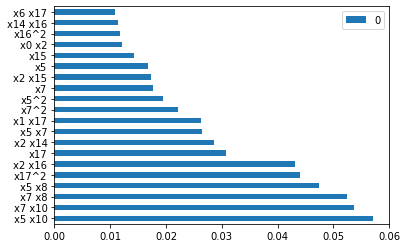

In [80]:
pd.DataFrame(important_features[:20]).plot(kind = 'barh', grid=False)

## <a name = p&c></a>VII. Pros & Cons of AutoML

#### Pros
1. Reduce bias and errors for machine learning models comparing to models building by human
2. Save time and efforts for data scientists to build and test optimized models
3. Perform with high accuracy
4. Companies can reduce cost of hiring prefessionals since implementing autoML tools is easy


#### Cons
1. AutoML takes time to run the model and depends on computation power
2. AutoML is a fairly new concept, therefore it is important to apply this method in caution since it is still under development
3. Less flexible if we want to have customize pipeline


## <a name = conclusion></a>VIII. Conclusion
Automated Machine Learning tool is a very convenient technology that reduce our time to develop and test a model. It is also easy to implement, which create additional time to data scientists to concentrate in model interpretation. However, it is relatively less flexible if we want to have a customize pipline and time consuming. TPOT is one of the popular autoML packages which is easy to implement and is very helpful to identify the optimal parameters, models and ensembles.

## <a name = reference></a>IX. Reference
Kaggle :<br>
https://www.kaggle.com/nikitpatel/churn-predication-model-lr-xgb-ada-gbc-etc-dtc<br>
https://www.kaggle.com/discdiver/tpot-on-ames-housing-regression/<br>
TPOT post:<br>
https://www.experfy.com/blog/tpot-automated-machine-learning-in-python<br>
https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9<br>
https://medium.com/@plog397/using-tpot-to-predict-dc-crimes-91b6c6641e13<br>
https://github.com/EpistasisLab/tpot/tree/master/tutorials<br>

TPOT documentation: https://epistasislab.github.io/tpot/using/<br>
https://www.wikiwand.com/en/Automated_machine_learning<br>



**A tutorial made by Yiting Tsai (yt9mh@virginia.edu) and Ying Xiong (yx4pt@virginia.edu) for SYS 6018**